# 線形回帰

In [131]:
# データ分析でよく使うnumpyと、グラフを描くためのmatplotlibをインポートします
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# jupyter notebookにグラフを表示するためのおまじない
%matplotlib inline

## 直線を探す関数を作る

In [132]:
def fit(X, Y):
    # パラメータの初期化
    a = 0
    b = 0

    # 学習率 (learning rate) - 1歩の大きさ
    learning_rate = 0.01

    # 繰り返しの回数 (iterations)
    iterations = 1000

    # データ数
    m = len(X)

    prev_cost = np.inf
    # 勾配降下法のループ
    for i in range(iterations):
        # 1. 現在のa, bでの予測値を計算
        Y_pred = a * X + b
    
        # 2. コスト関数の勾配（傾き）を計算
        # ちょっと難しい数式だけど、aとbそれぞれでコスト関数の偏微分（へんびぶん）を計算しているよ
        D_a = (-2/m) * sum(X * (Y - Y_pred))
        D_b = (-2/m) * sum(Y - Y_pred)
    
        # 3. aとbを更新（谷を少し下る）
        a = a - learning_rate * D_a
        b = b - learning_rate * D_b

        # コスト（ズレの2乗の平均）を計算
        cost = np.sum((Y - Y_pred)**2) / m
  
        # 途中の経過を見てみよう (100回ごとに表示)
        if (i+1) % 100 == 0:
            print(f"{i+1}回目: a={a:.3f}, b={b:.3f}, コスト={cost:.2f}")

        if cost > prev_cost:
            break
        prev_cost = cost

    print(f"見つかった最適な傾き a: {a:.3f}")
    print(f"見つかった最適な切片 b: {b:.3f}")

    return (a, b)

## サンプルデータでやってみる

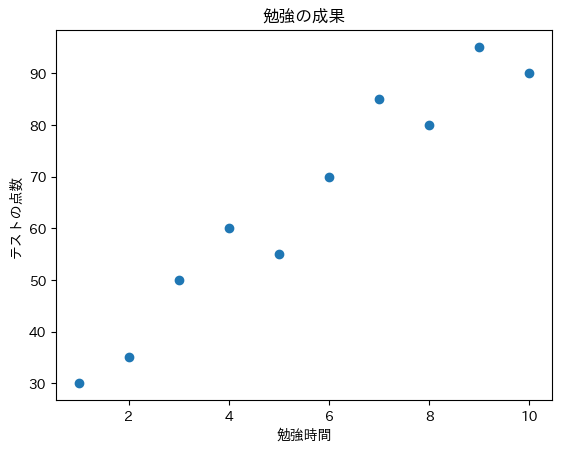

In [133]:
# xが勉強時間(時間)、yがテストの点数(点)

# サンプルデータ
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Y = np.array([30, 35, 50, 60, 55, 70, 85, 80, 95, 90])

# 散布図を描画する
plt.scatter(X, Y)
plt.xlabel("勉強時間") # x軸のラベル
plt.ylabel("テストの点数") # y軸のラベル
plt.title("勉強の成果") # グラフのタイトル
plt.show()

<div class="alert alert-block alert-info">
↑ななめの直線が引けそう…
</div>

100回目: a=9.486, b=9.591, コスト=79.95
200回目: a=8.726, b=14.884, コスト=50.75
300回目: a=8.227, b=18.359, コスト=38.17
400回目: a=7.899, b=20.640, コスト=32.74
500回目: a=7.684, b=22.138, コスト=30.41
600回目: a=7.543, b=23.121, コスト=29.40
700回目: a=7.450, b=23.766, コスト=28.97
800回目: a=7.389, b=24.190, コスト=28.78
900回目: a=7.349, b=24.468, コスト=28.70
1000回目: a=7.323, b=24.651, コスト=28.66
見つかった最適な傾き a: 7.323
見つかった最適な切片 b: 24.651


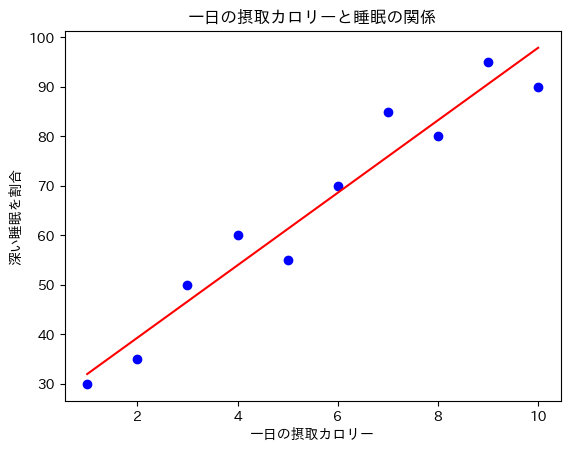

In [134]:
# 散布図を描画
plt.scatter(X, Y, color='blue')
# a, bを見つける
a, b = fit(X, Y)
# 見つけ出した直線を描画
plt.plot(X, a * X + b, color='red')

plt.xlabel("一日の摂取カロリー")
plt.ylabel("深い睡眠を割合")
plt.title("一日の摂取カロリーと睡眠の関係")
plt.show()

<div class="alert alert-block alert-info">
↑うまくいった！
</div>

## 理科の自由研究のデータでやってみる

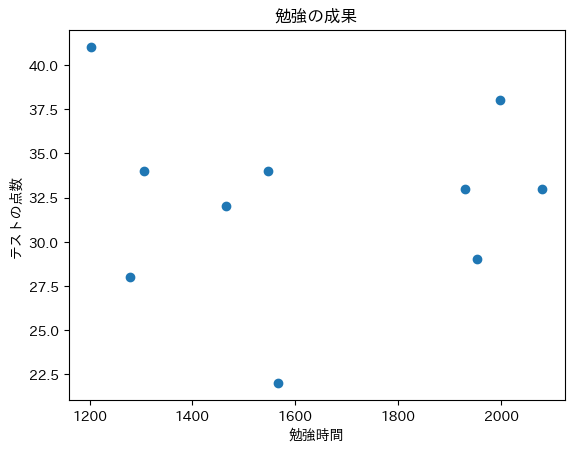

In [135]:
X = np.array([1997, 1546, 1930, 2079, 1306, 1566, 1279, 1203, 1953, 1466])
Y = np.array([38, 34, 33, 33, 34, 22, 28, 41, 29, 32])

# 散布図を描画する
plt.scatter(X, Y)
plt.xlabel("勉強時間") # x軸のラベル
plt.ylabel("テストの点数") # y軸のラベル
plt.title("勉強の成果") # グラフのタイトル
plt.show()

<div class="alert alert-block alert-info">
↑かなりバラバラ…
</div>

見つかった最適な傾き a: -58383496.250
見つかった最適な切片 b: -34495.858


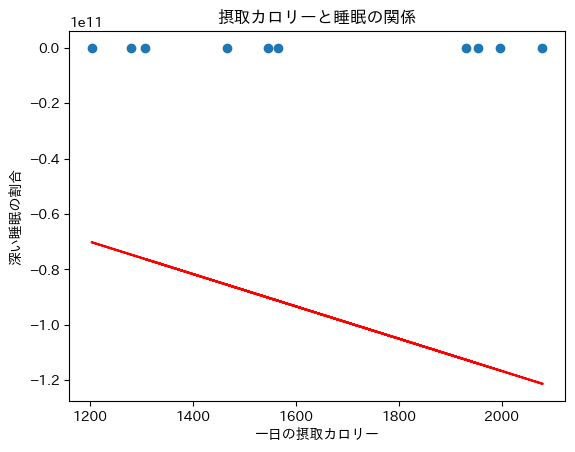

In [136]:
# 散布図を再度描画
plt.scatter(X, Y)

# a, bを見つける
a, b = fit(X, Y)
# 見つけ出した直線を描画
plt.plot(X, a * X + b, color='red')

plt.xlabel("一日の摂取カロリー") # x軸のラベル
plt.ylabel("深い睡眠の割合") # y軸のラベル
plt.title("摂取カロリーと睡眠の関係") # グラフのタイトル
plt.show()

<div class="alert alert-block alert-info">
↑うまくいかない…
</div>

## ライブラリを使ってみる

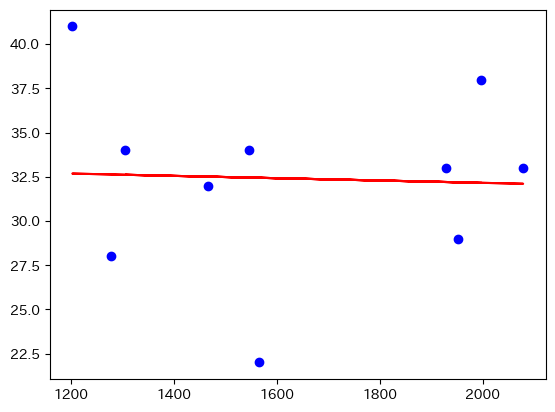

In [137]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = X.reshape(-1, 1)
lr.fit(X, Y)
y_pred = lr.predict(X)
plt.scatter(X, Y, color='blue')
plt.plot(X, y_pred, color='red')
plt.show()

<div class="alert alert-block alert-info">
↑一応真ん中には引けた？
</div>

## 曲線にしてみる

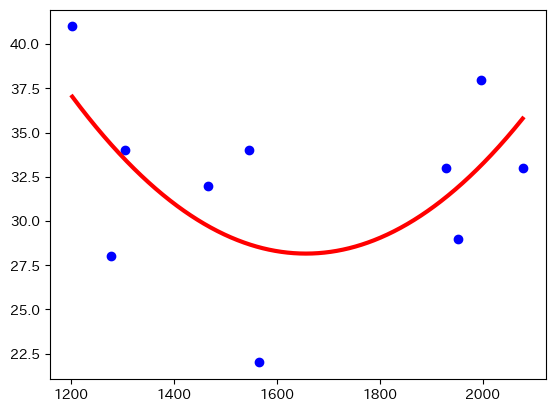

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# 2次元の特徴量に変換
X = X.reshape(-1, 1)
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)
 
# y = b0 + b1x + b2x^2 の b0～b2 を算出
model = LinearRegression()
model.fit(x_poly, Y)
# y_pred = model.predict(x_poly)

X_fit          = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
X_quad_fit     = polynomial_features.fit_transform(X_fit)
y_quad_predict = model.predict(X_quad_fit)

plt.scatter(X, Y, color = 'blue')
plt.plot(X_fit, 
         y_quad_predict, 
         color='red', 
         lw=3,
        )
plt.show()

<div class="alert alert-block alert-info">
↑結構それっぽいかも
</div>